In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


In [2]:
# Load the Boston Housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1],
data.iloc[:, -1], test_size=0.2, random_state=42)


In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(64, activation='relu', 
input_shape=(X_train.shape[1],)),
 tf.keras.layers.Dense(32, activation='relu'),
 tf.keras.layers.Dense(1)])



In [8]:
model.compile(optimizer='adam', loss='mse')

In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
validation_split=0.2)

Epoch 1/100
413/413 [==============================] - 5s 7ms/step - loss: 1.1730 - val_loss: 0.4900
Epoch 2/100
413/413 [==============================] - 2s 4ms/step - loss: 0.4307 - val_loss: 0.4107
Epoch 3/100
413/413 [==============================] - 1s 4ms/step - loss: 0.3717 - val_loss: 0.3931
Epoch 4/100
413/413 [==============================] - 1s 4ms/step - loss: 0.3537 - val_loss: 0.3763
Epoch 5/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3421 - val_loss: 0.3776
Epoch 6/100
413/413 [==============================] - 1s 4ms/step - loss: 0.3330 - val_loss: 0.3620
Epoch 7/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3241 - val_loss: 0.3628
Epoch 8/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3232 - val_loss: 0.3502
Epoch 9/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3144 - val_loss: 0.3410
Epoch 10/100
413/413 [==============================] - 2s 6ms/step - loss: 0.3073 - val_lo

In [10]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.2785


0.2785296142101288

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

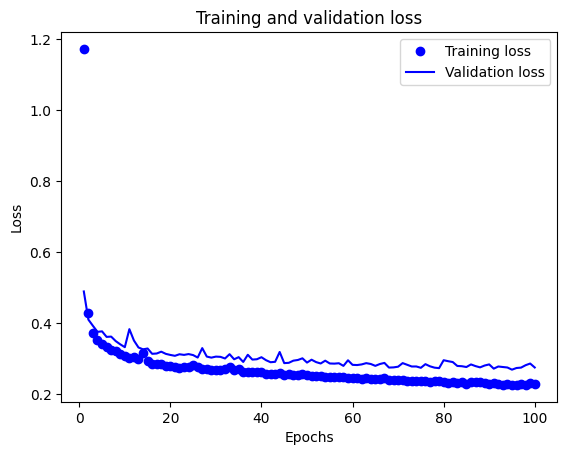

In [12]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
